In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [2]:
x_train = torch.FloatTensor([[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

In [3]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

**Model**

In [5]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)

In [6]:
model = SoftmaxClassifierModel()

In [7]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [9]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    
    for epoch in range(nb_epochs):
        prediction = model(x_train)
        cost = F.cross_entropy(prediction, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{}, Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

In [10]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}%, Cost: {:.6f}'.format(correct_count / len(y_test) * 100, cost.item()))

In [11]:
train(model, optimizer, x_train, y_train)

Epoch    0/20, Cost: 2.203667
Epoch    1/20, Cost: 1.199645
Epoch    2/20, Cost: 1.142985
Epoch    3/20, Cost: 1.117769
Epoch    4/20, Cost: 1.100901
Epoch    5/20, Cost: 1.089523
Epoch    6/20, Cost: 1.079872
Epoch    7/20, Cost: 1.071320
Epoch    8/20, Cost: 1.063325
Epoch    9/20, Cost: 1.055720
Epoch   10/20, Cost: 1.048378
Epoch   11/20, Cost: 1.041245
Epoch   12/20, Cost: 1.034285
Epoch   13/20, Cost: 1.027478
Epoch   14/20, Cost: 1.020813
Epoch   15/20, Cost: 1.014279
Epoch   16/20, Cost: 1.007872
Epoch   17/20, Cost: 1.001586
Epoch   18/20, Cost: 0.995419
Epoch   19/20, Cost: 0.989365


In [12]:
test(model, optimizer, x_test, y_test)

Accuracy: 0.0%, Cost: 1.425844


**Learning Rate**

In [14]:
model = SoftmaxClassifierModel()

In [15]:
optimizer = optim.SGD(model.parameters(), lr = 1e5)

In [16]:
train(model, optimizer, x_train, y_train)

Epoch    0/20, Cost: 1.280268
Epoch    1/20, Cost: 976950.750000
Epoch    2/20, Cost: 1279135.250000
Epoch    3/20, Cost: 1198378.875000
Epoch    4/20, Cost: 1098825.750000
Epoch    5/20, Cost: 1968197.750000
Epoch    6/20, Cost: 284763.250000
Epoch    7/20, Cost: 1532260.250000
Epoch    8/20, Cost: 1651503.750000
Epoch    9/20, Cost: 521878.593750
Epoch   10/20, Cost: 1397263.250000
Epoch   11/20, Cost: 750986.375000
Epoch   12/20, Cost: 918691.375000
Epoch   13/20, Cost: 1487888.250000
Epoch   14/20, Cost: 1582260.250000
Epoch   15/20, Cost: 685818.125000
Epoch   16/20, Cost: 1140048.875000
Epoch   17/20, Cost: 940566.375000
Epoch   18/20, Cost: 931638.250000
Epoch   19/20, Cost: 1971322.750000


In [17]:
model = SoftmaxClassifierModel()

In [18]:
optimizer = optim.SGD(model.parameters(), lr = 1e-10)

In [19]:
train(model, optimizer, x_train, y_train)

Epoch    0/20, Cost: 3.187324
Epoch    1/20, Cost: 3.187324
Epoch    2/20, Cost: 3.187324
Epoch    3/20, Cost: 3.187324
Epoch    4/20, Cost: 3.187324
Epoch    5/20, Cost: 3.187324
Epoch    6/20, Cost: 3.187324
Epoch    7/20, Cost: 3.187324
Epoch    8/20, Cost: 3.187324
Epoch    9/20, Cost: 3.187324
Epoch   10/20, Cost: 3.187324
Epoch   11/20, Cost: 3.187324
Epoch   12/20, Cost: 3.187324
Epoch   13/20, Cost: 3.187324
Epoch   14/20, Cost: 3.187324
Epoch   15/20, Cost: 3.187324
Epoch   16/20, Cost: 3.187324
Epoch   17/20, Cost: 3.187324
Epoch   18/20, Cost: 3.187324
Epoch   19/20, Cost: 3.187324


In [20]:
model = SoftmaxClassifierModel()

In [21]:
optimizer = optim.SGD(model.parameters(), lr = 1e-1)

In [22]:
train(model, optimizer, x_train, y_train)

Epoch    0/20, Cost: 1.341574
Epoch    1/20, Cost: 1.198802
Epoch    2/20, Cost: 1.150877
Epoch    3/20, Cost: 1.131977
Epoch    4/20, Cost: 1.116242
Epoch    5/20, Cost: 1.102514
Epoch    6/20, Cost: 1.089676
Epoch    7/20, Cost: 1.077479
Epoch    8/20, Cost: 1.065775
Epoch    9/20, Cost: 1.054511
Epoch   10/20, Cost: 1.043655
Epoch   11/20, Cost: 1.033187
Epoch   12/20, Cost: 1.023091
Epoch   13/20, Cost: 1.013356
Epoch   14/20, Cost: 1.003968
Epoch   15/20, Cost: 0.994917
Epoch   16/20, Cost: 0.986189
Epoch   17/20, Cost: 0.977775
Epoch   18/20, Cost: 0.969661
Epoch   19/20, Cost: 0.961836


**Data Processing**

In [23]:
x_train = torch.FloatTensor([[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [24]:
mu = x_train.mean(dim = 0)

In [25]:
sigma = x_train.std(dim = 0)

In [27]:
norm_x_train = (x_train - mu) / sigma

In [28]:
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [32]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [33]:
model = MultivariateLinearRegressionModel()

In [34]:
optimizer = optim.SGD(model.parameters(), lr = 1e-1)

In [35]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    
    for epoch in range(nb_epochs):
        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print("Epoch {:4d}/{}, Cost: {:.6f}".format(epoch, nb_epochs, cost.item()))

In [36]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20, Cost: 29602.087891
Epoch    1/20, Cost: 18798.478516
Epoch    2/20, Cost: 11988.445312
Epoch    3/20, Cost: 7660.372559
Epoch    4/20, Cost: 4899.234375
Epoch    5/20, Cost: 3134.669922
Epoch    6/20, Cost: 2006.090454
Epoch    7/20, Cost: 1284.011108
Epoch    8/20, Cost: 821.937134
Epoch    9/20, Cost: 526.222473
Epoch   10/20, Cost: 336.965057
Epoch   11/20, Cost: 215.836151
Epoch   12/20, Cost: 138.308807
Epoch   13/20, Cost: 88.686180
Epoch   14/20, Cost: 56.922966
Epoch   15/20, Cost: 36.589779
Epoch   16/20, Cost: 23.571926
Epoch   17/20, Cost: 15.236008
Epoch   18/20, Cost: 9.896884
Epoch   19/20, Cost: 6.475713


**Overfitting**

In [39]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    
    for epoch in range(nb_epochs):
        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)

        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print("Epoch {:4d}/{}, Cost: {:.6f}".format(epoch+1, nb_epochs, cost.item()))

In [40]:
model = MultivariateLinearRegressionModel()

In [41]:
optimizer = optim.SGD(model.parameters(), lr = 1e-1)

In [42]:
train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20, Cost: 29475.767578
Epoch    2/20, Cost: 18791.171875
Epoch    3/20, Cost: 12053.740234
Epoch    4/20, Cost: 7769.610352
Epoch    5/20, Cost: 5035.856934
Epoch    6/20, Cost: 3288.601074
Epoch    7/20, Cost: 2171.032715
Epoch    8/20, Cost: 1455.978271
Epoch    9/20, Cost: 998.392273
Epoch   10/20, Cost: 705.545166
Epoch   11/20, Cost: 518.118896
Epoch   12/20, Cost: 398.159241
Epoch   13/20, Cost: 321.377930
Epoch   14/20, Cost: 272.230255
Epoch   15/20, Cost: 240.768875
Epoch   16/20, Cost: 220.626984
Epoch   17/20, Cost: 207.729843
Epoch   18/20, Cost: 199.469604
Epoch   19/20, Cost: 194.177429
Epoch   20/20, Cost: 190.785126


In [43]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [45]:
device = "cuda" if torch.cuda.is_available() else "cpu"

random.seed(777)
torch.manual_seed(777)
if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [56]:
training_epochs = 15
batch_size = 100

In [57]:
mnist_train = dsets.MNIST(root = "MNIST_data/",
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)

mnist_test = dsets.MNIST(root = "MNIST_data/",
                         train = False,
                         transform = transforms.ToTensor(),
                         download = True)

In [58]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last = True)

In [59]:
linear = torch.nn.Linear(784, 10, bias = True).to(device)

In [60]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [61]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print("Epoch:", "%04d" % (epoch + 1), ", cost =", "{:.9f}".format(avg_cost))

print("Learning finished")

Epoch: 0001 , cost = 0.533962846
Epoch: 0002 , cost = 0.359108061
Epoch: 0003 , cost = 0.330940813
Epoch: 0004 , cost = 0.316361904
Epoch: 0005 , cost = 0.306856751
Epoch: 0006 , cost = 0.300126642
Epoch: 0007 , cost = 0.294785112
Epoch: 0008 , cost = 0.290628731
Epoch: 0009 , cost = 0.287212074
Epoch: 0010 , cost = 0.284352064
Epoch: 0011 , cost = 0.281648785
Epoch: 0012 , cost = 0.279627115
Epoch: 0013 , cost = 0.277660429
Epoch: 0014 , cost = 0.275821596
Epoch: 0015 , cost = 0.274172276
Learning finished


Accuracy: 0.8881999850273132
Label : 8
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


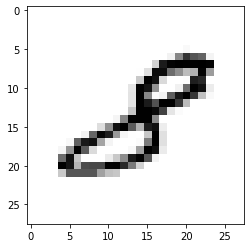

In [62]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy:", accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print("Label :", Y_single_data.item())
    single_prediction = linear(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap = "Greys", interpolation = "nearest")
    plt.show()